In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import nltk 
nltk.download('stopwords')
plt.rcParams["figure.figsize"] = (15,6)

[nltk_data] Downloading package stopwords to /home/faten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
from scipy.spatial.distance import cdist

def get_tfidf(language, data):
    if language == "english":
        stop_words = stopwords.words('english')
    elif language == "german": 
        stop_words = stopwords.words('german')
    else: 
        raise language + " is not supported."

    # Vectorizer 
    vectorizer = TfidfVectorizer(
        max_df=0.9,
        min_df=0.01,
        stop_words=stop_words,
    )

    X_tfidf = vectorizer.fit_transform(data)
    print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

    return X_tfidf


def plot_elbow(X_tfidf, title, language, save_plot=True):
    fig, ax = plt.subplots(1, 1)
    # fig, axs = plt.subplots(1, 2)
    wcss = []
    distortions = []
    max=41
    for i in range(1, max):
        kmeans = KMeans(
            n_clusters=i, 
            init='k-means++', 
            random_state=42)
        kmeans.fit(X_tfidf)
        wcss.append(kmeans.inertia_) 
        
    ax.plot(range(1, max), wcss, marker='o', linestyle='--')    
    
    ax.title.set_text(title)
    ax.set_ylabel("WCSS")
    ax.set_xlabel("Number of Clusters")
    ax.grid(True)
    if save_plot:
        ax.get_figure().savefig("figures/clust_elbow_"+language, bbox_inches="tight") 

def cluster(X_tfidf, k, title, language, save_plot=True):
    X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())
    
    kmeans= KMeans(
        n_clusters=k,
        max_iter=100,
        n_init=3,
        random_state=42,
    ).fit(X_pca) 

    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}") 

    # Plotting
    fig, ax = plt.subplots(1, 1)
    for cluster in range(k):
        ax.scatter(X_pca[kmeans.labels_ == cluster, 0], X_pca[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster+1}')
    ax.title.set_text(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    # plt.legend()
    plt.show()
    if save_plot:
        ax.get_figure().savefig("figures/clusters_"+language, bbox_inches="tight") 

<hr>

In [61]:
X_tfidf.shape

(9324, 259)

n_samples: 9324, n_features: 259


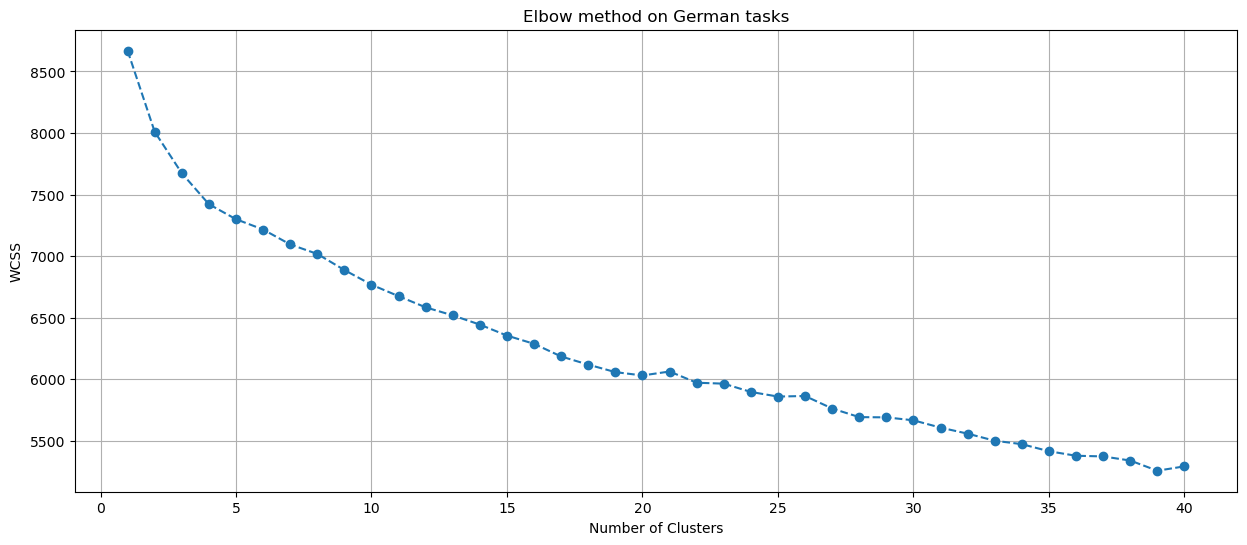

In [62]:
df = pd.read_csv("data/final_tasks_DE.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"] 
X_tfidf = get_tfidf(language="german", data=data) 
plot_elbow(X_tfidf=X_tfidf, title="Elbow method on German tasks", language="DE", save_plot=False)

Number of elements assigned to each cluster: [ 788 8536]


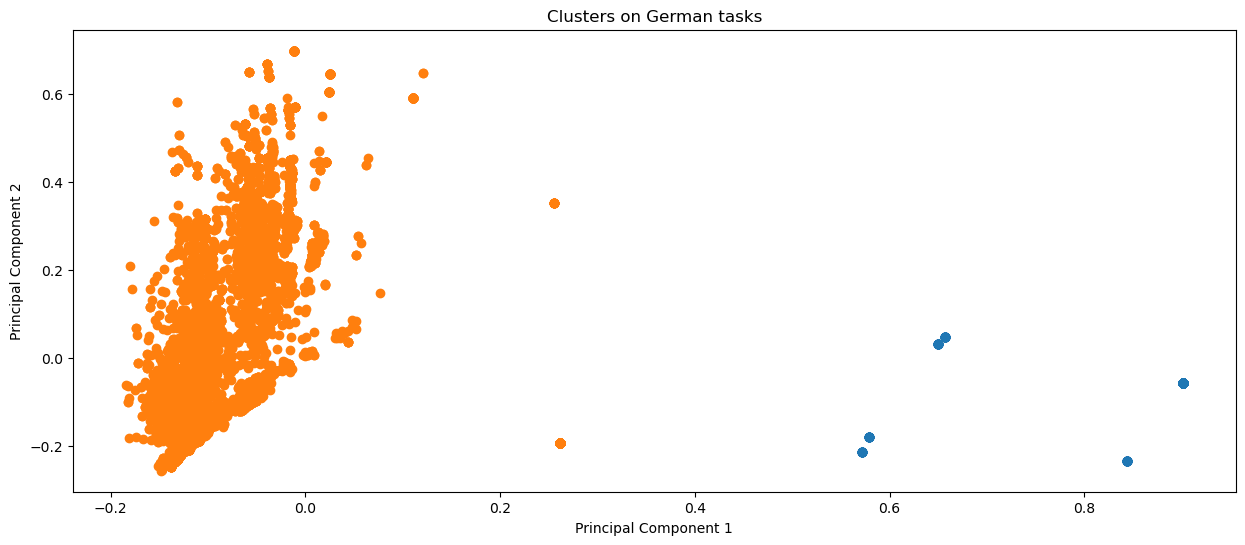

In [65]:
cluster(X_tfidf=X_tfidf, k=2, title="Clusters on German tasks", language="DE", save_plot=False)

<hr>

n_samples: 1787, n_features: 1412


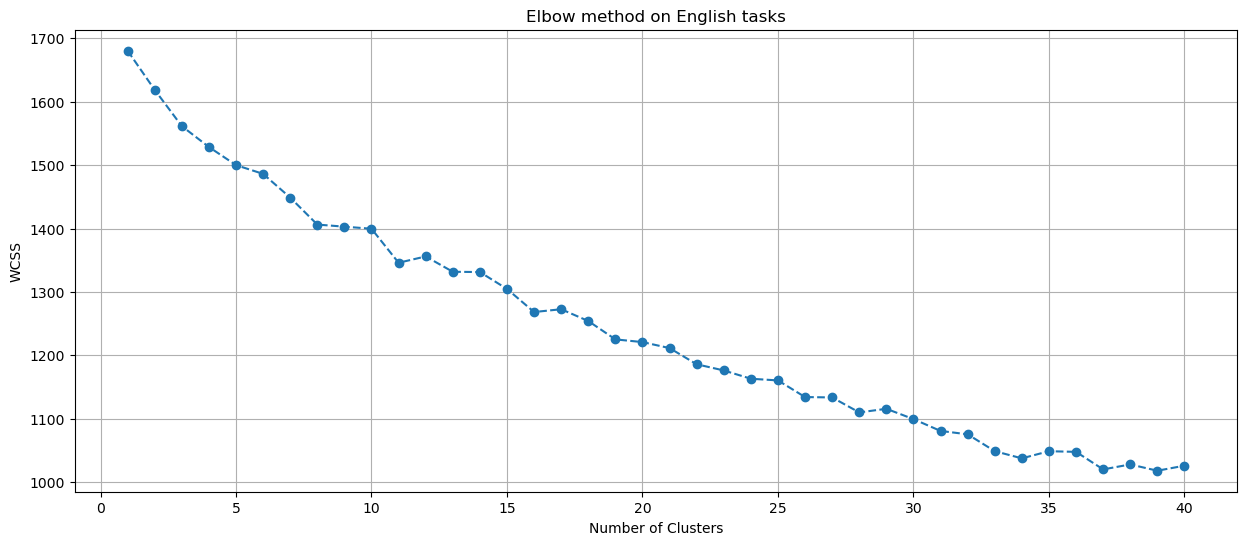

In [54]:
df = pd.read_csv("data/final_tasks_EN.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"] 
X_tfidf = get_tfidf(language="english", data=data) 
plot_elbow(X_tfidf=X_tfidf, title="Elbow method on English tasks", language="EN", save_plot=False)

Number of elements assigned to each cluster: [6254  788 2282]


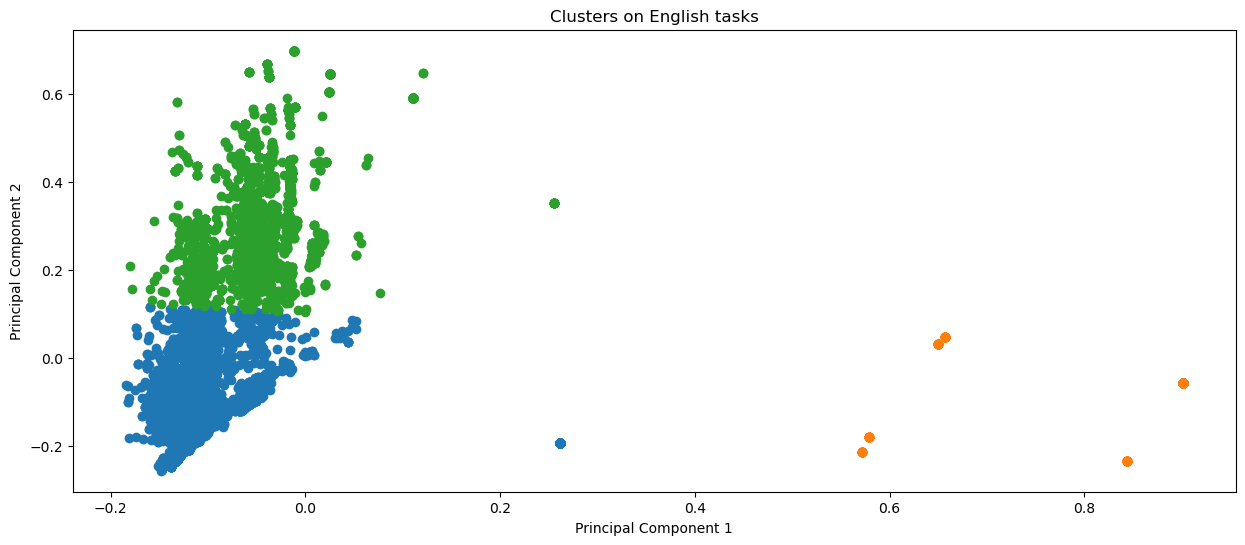

In [66]:
cluster(X_tfidf=X_tfidf, k=3, title="Clusters on English tasks", language="EN", save_plot=False)